# General information
 * Author: Joris Busink, Junior Teacher Physics Education.
 * Date: Fri, 14th Okt.
 * About: Data processing script for high-speed camera. 

# Example: Analysis of a pendulum (SHO) using a high speed camera

## Model

In this experiment, I took data from a pendulum using the high speed camera. The data shows us the x-coordinate of the position of the mass.<br>
We can describe the x-position using Newton’s second law of motion and performing a force analysis. 

We get the following differential equation for a simple pendulum:

$\frac{d^2\theta}{dt^2} +\frac{g}{l}\sin{\theta} =0$. 

Using the small angle approximation $\sin{\theta} \approx \theta$ we arrive to

$\frac{d^2\theta}{dt^2} +\frac{g}{l} \theta =0$. 

The solution of this differential equation has the form:

$\theta(t) = A\sin(\omega_n t+\phi)$, with $\omega_n^2 =\frac{g}{l}$.<br>

Finally, in the reference frame of the camera, the equation becomes:<br>

$x(t) = A\sin(\omega_n t+\phi)+x_0$.

A is the amplitude of the pendulum (in the x-direction), $\omega_n$ is the (normal) frequency of the pendulum. 
The frequency depends on the ratio of the gravitational acceleration g and the length of the cord l. <br>
$\phi$ is the phase of the oscillation and $x_0$ is the offset.<br>


## Load packages
I load the following packages: numpy, matplotlib.pyplot, pandas. These pacakges are always useful in doing nummerical calculations using Python.

In [1]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit
np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

cwd = os.getcwd() #get current working directory.
cwd= os.path.split(os.getcwd())[0] 

## Load, read and filter data from high speed camera
In this section we load, read and filter the data from the high speed camera. <br>
The output data is a .mqa extension, this is program specific extension used by the tracking software.<br>
This, however, is not a problem for Python 3 to handle.

 * Line 1: make dataframe 'df' that contains all data.<br>

 * Line 3-5: change the numerical separator from a comma to a dot (In the Netherlands we use comma, international standard is a dot.)<br>

 * Line 6-7: remove "Not-a-Number", nan, values from the list.<br>

 * Line 8-11: make a subselection of the data. Handling large datafiles can be very slow and annoying. 
<br>


In [2]:
df=pd.read_csv(cwd+'/data/Slingerdata_1.mqa', sep='\t',header=0)
Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()
Xpos = [x for x in Xpos if str(x) != 'nan']
Ypos = [x for x in Ypos if str(x) != 'nan']

t=np.asarray(Time[:15000]) 
scaling = 1/1000 #scaling factor from pixel to [m]
x = np.asarray(Xpos[0:15000])*scaling 
y = np.asarray(Ypos[0:15000])*scaling 

### Plot the data
In the next lines of code I plot the data. On the y-axis I plot the x-position (m) of pendulum, on the x-axis I plot the time (s). 

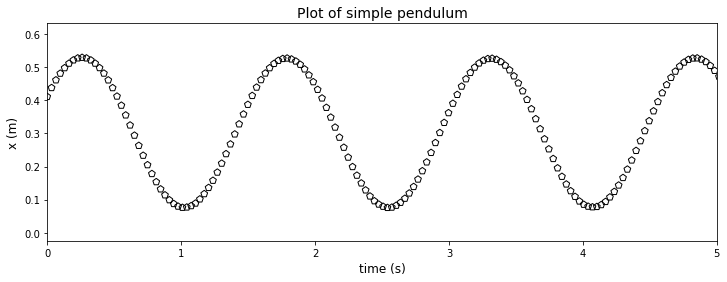

In [4]:
fig, axes = plt.subplots(1,1,figsize=(12,4)) #Creates a single figure with dimensions (12 by 6 (inch))
axes.scatter(t[::10],x[::10] ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint t[::10], can be modified.

#plot axis labels,title and adjust limits
axes.set_title('Plot of simple pendulum',fontsize=14)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
axes.set_xlim(0,5)
axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

plt.show()

### Fit data to model
 * Line 1-2: User defined model based on the theory. We vary the time coordinate (the independent variable, t) and the parameters a-d are determined by a fit. Note that the independent variable (t) must appear<em> before </em> the parameters, otherwise an errormessage will follow.<br>

 * Line 4: Apply a fit using the curve_fit function. Curve_fit asks for three input arguments (model, independent variable (t), dependent variable (x)), more input is optional.<br>
 In this case, I provide an initial guess of the optimal parameters (p0) and some bounds to the parameters. Other options include: weights, bounds, etc. <br>
 Note that providing a good initial guess and bounds significantly reduces the complexity of findings the optimal parameters, if possible, provided them!<br>
 The output of curve_fit is popt (optimal parameter) and pcov (the covariance matrix $\mathcal{K_{p_i p_j}}$ ): <br>

 * $\mathcal{K_{p_i p_j}}= \begin{bmatrix} s_{p_a p_a} & s_{p_b p_a} \\ s_{p_a p_b} & s_{p_b p_b} \end{bmatrix}$. <br>
 
 * $s_{p_a p_a}$ is the covariance of parameter a. To calculate the standard deviation of the parameter we take the square root of the variance
 $\sigma_{aa} = \sqrt{s_{p_a p_a}}$ the standard deviation of the estimated parameter.


 * Line 6-8: Show the optimal values that curve_fit found. <br>

 * Line 10-16: Make figure, plot the data (black) and the fit (darkred).<br>

### Optional commands
* Line 29-30: Save the figure. Note that the figure is saved as a .svg extension. A .svg extension stands for Scalable Vector Image, the image is saved as an object (and not as a collection of pixels). One can import .svg picture in e.g. inkscape or adobe photoshop to manipulate these.<br>